In [1]:
from light_curves import LightCurve
from exposures import Calexp
from task import Run
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm

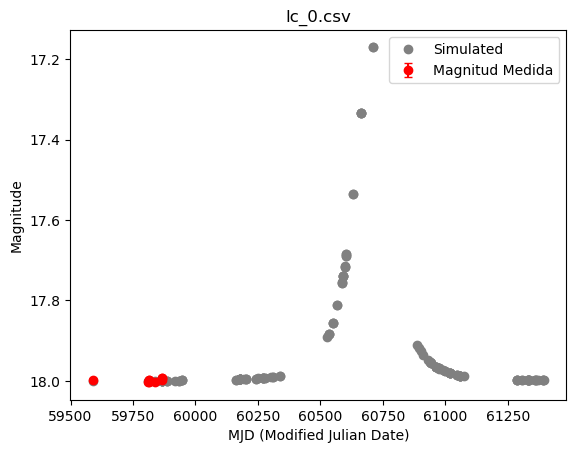

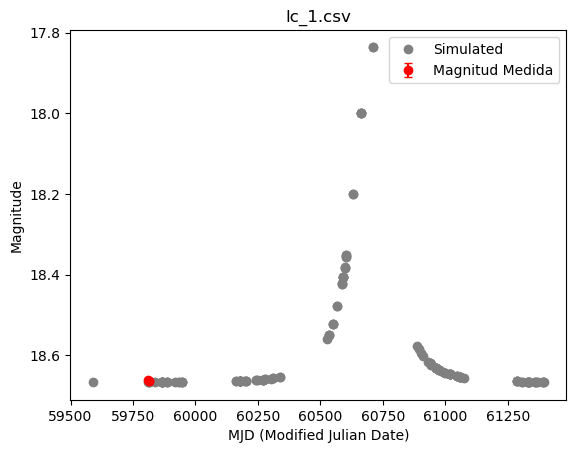

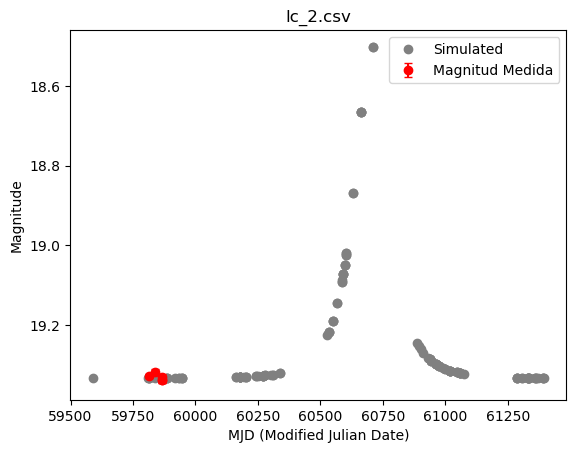

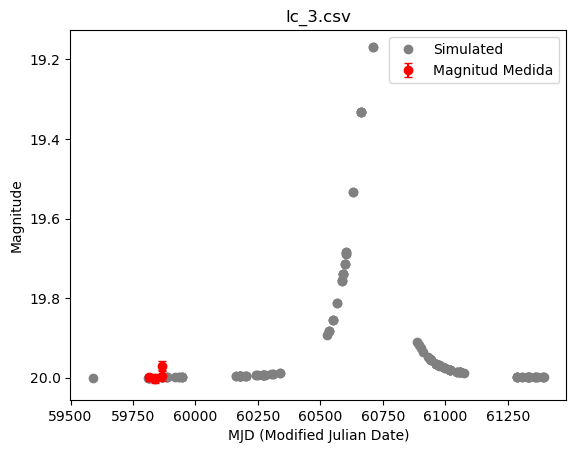

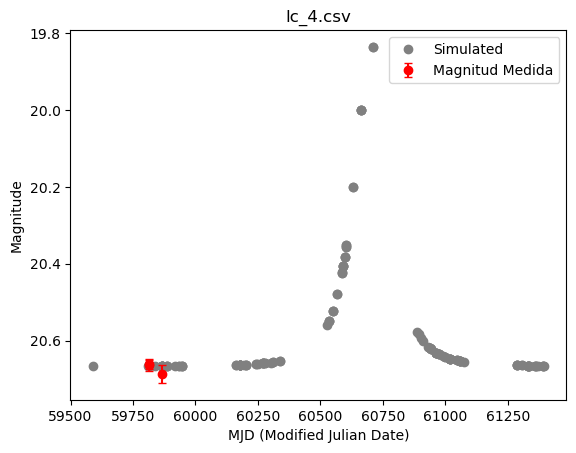

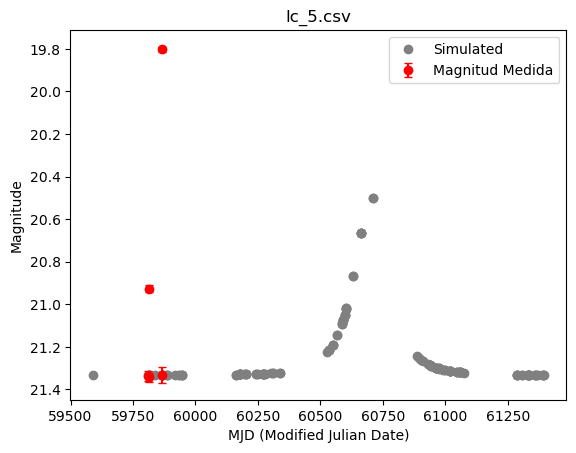

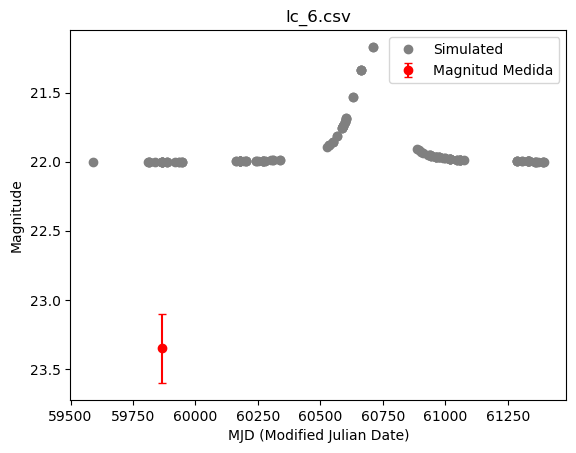

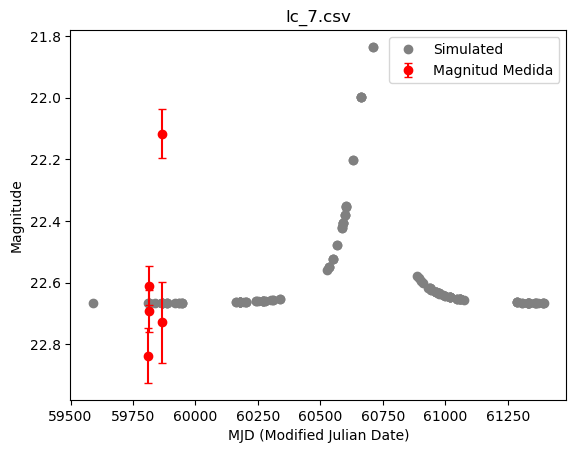

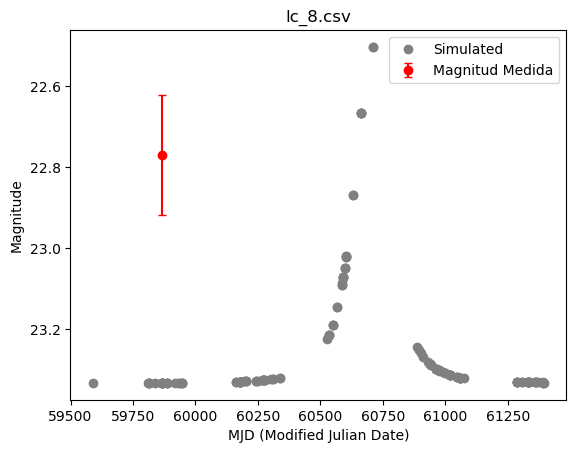

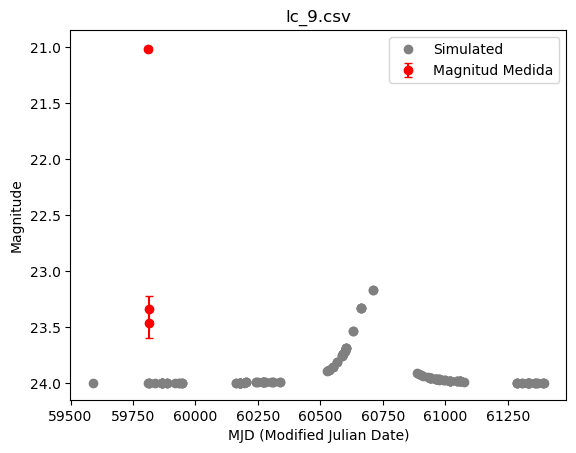

In [3]:
# Plot light curves from a run
import pandas as pd
n=10; lvl = 20
path = f"runs/run_{n}pts_{lvl}lvl/"
for lc_path in sorted([file for file in os.listdir(path) if file.startswith("lc")]):
    lc = LightCurve(data=pd.read_csv(path+lc_path))
    lc.plot(title = lc_path)


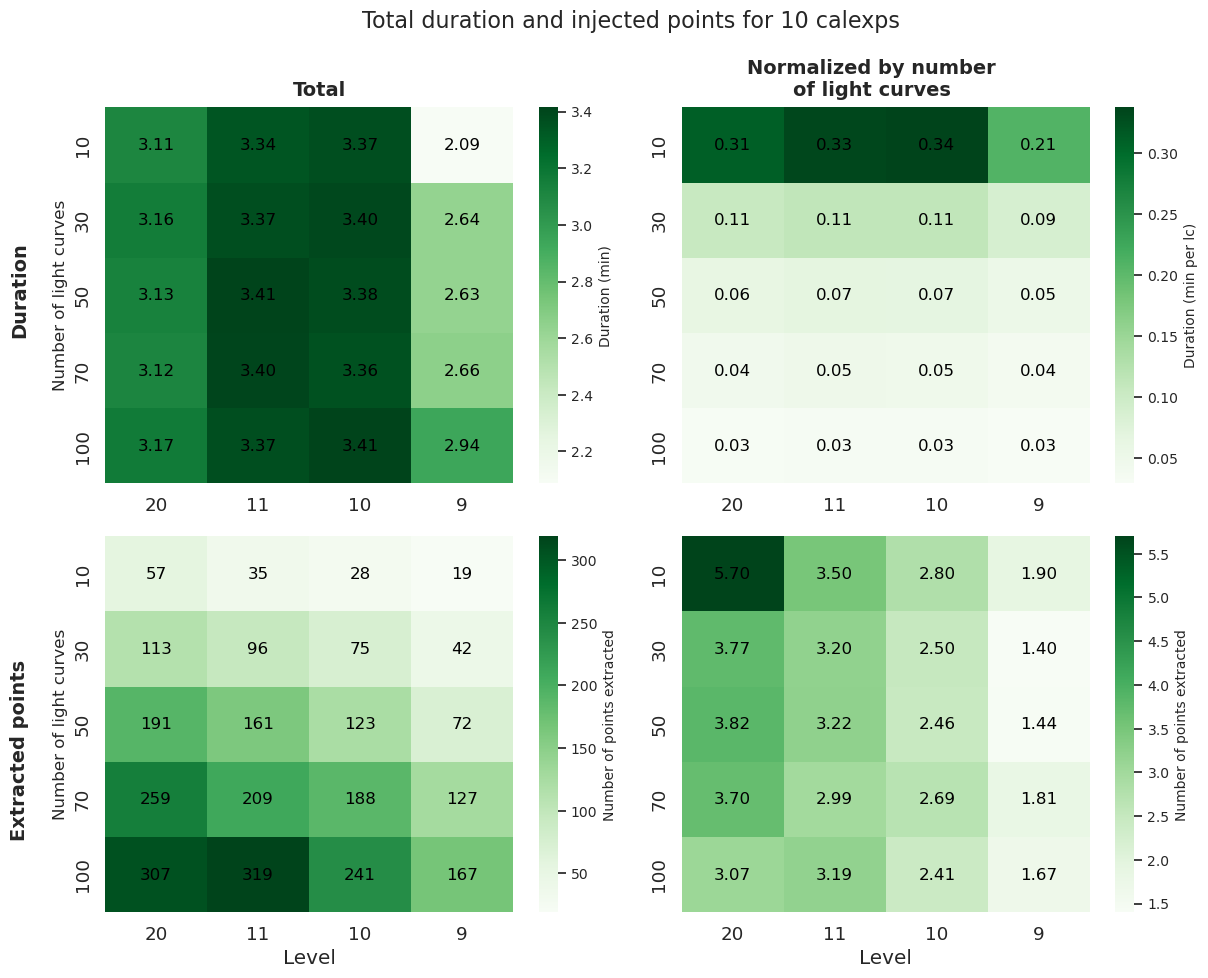

In [132]:
# Total durations and total extracted points per HTM level and points injected
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)


fig, axes = plt.subplots(2, 2, figsize=(12, 10)) 
fig.suptitle("Total duration and injected points for 10 calexps", fontsize=16) 

# Gráfico 1: Duration
sns.heatmap(durations, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 0])
cbar = axes[0, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  
cbar.set_label('Duration (min)', fontsize=10)  
axes[0, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[0, 0].set_title('Duration')

# Gráfico 2: Duration - Normalized
sns.heatmap(durations_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[0, 1])
cbar = axes[0, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10) 
cbar.set_label('Duration (min per lc)', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
# axes[0, 1].set_title('Duration - Normalized')

# Gráfico 3: Injected points
sns.heatmap(points, cmap='Greens', annot=True, fmt=".0f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 0])
cbar = axes[1, 0].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 0].set_xlabel('Level')
axes[1, 0].set_ylabel('Number of light curves', fontsize=12)
# axes[1, 0].set_title('Injected points')

# Gráfico 4: Injected points - Normalized
sns.heatmap(points_normalized, cmap='Greens', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Number of points injected'}, 
            annot_kws={'size': 12, 'color': 'black'}, ax=axes[1, 1])
cbar = axes[1, 1].collections[0].colorbar
cbar.ax.tick_params(labelsize=10)  # Ajustar el tamaño de los ticks
cbar.set_label('Number of points extracted', fontsize=10)  # Ajustar el tamaño de la etiqueta del colorbar
axes[1, 1].set_xlabel('Level')
# axes[1, 1].set_title('Injected points - Normalized')

# Etiquetas de las filas y columnas
fig.text(0.24, 0.9, 'Total', ha='center', va='center', fontsize=14, fontweight='bold')
fig.text(0.7, 0.91, 'Normalized by number\nof light curves', ha='center', va='center', fontsize=14, fontweight='bold')

fig.text(-0.01, 0.7, 'Duration', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')
fig.text(-0.01, 0.24, 'Extracted points', ha='center', va='center', fontsize=14, fontweight='bold', rotation='vertical')

# Ajustar diseño para evitar superposición
plt.tight_layout(rect=[0, 0, 1, 0.95])  # rect ajusta el espacio para el título general
plt.savefig('runs/test_10_calexps/comparative_analysis.png', bbox_inches='tight')  # Guardar la figura combinada
plt.show()


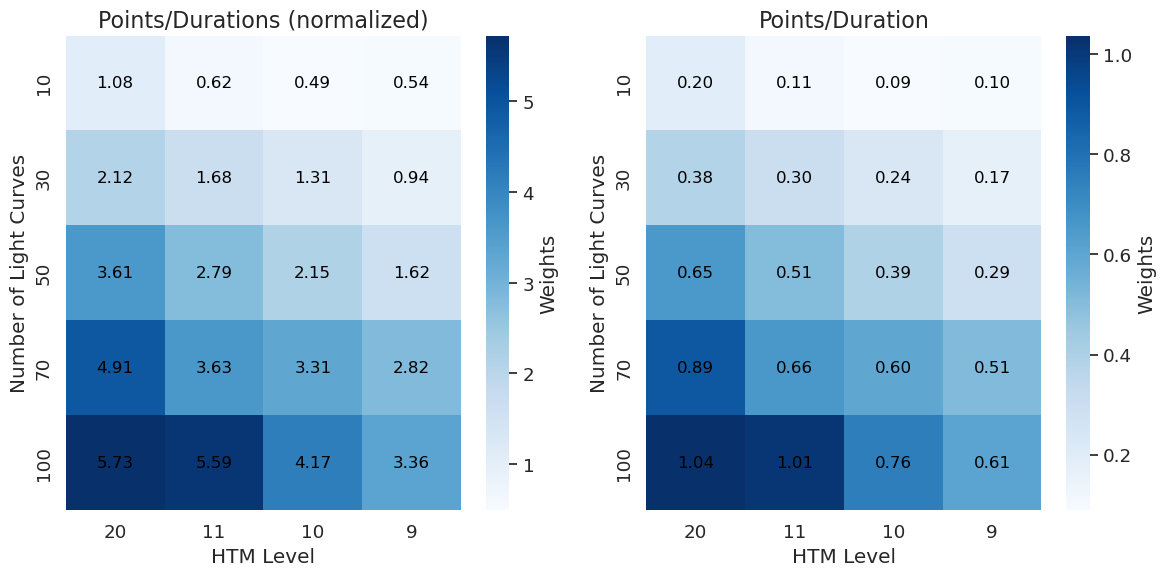

In [144]:
# Optimization index: maximize [extracted_points]/[duration]
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

n_points = [10, 30, 50, 70, 100]
levels = [20, 11, 10, 9]
durations = np.zeros((len(n_points), len(levels)))
durations_normalized = np.zeros((len(n_points), len(levels)))
points = np.zeros((len(n_points), len(levels)))
points_normalized = np.zeros((len(n_points), len(levels)))
weights = np.zeros((len(n_points), len(levels)))

for i, n in enumerate(n_points):
    for j, lvl in enumerate(levels):
        time_path = f"runs/test_10_calexps/run_{n}pts_{lvl}lvl/time_log.csv"
        df = pd.read_csv(time_path)
        points[i, j] = sum(df[df["task"] == "Finding points"]["detail"])
        points_normalized[i, j] = sum(df[df["task"] == "Finding points"]["detail"]) / n
        times = df["time"].values
        total_duration = times[-1] - times[1]
        durations[i, j] = total_duration / 60
        durations_normalized[i, j] = (total_duration / 60) / n

weights_1 = (points_normalized / np.max(points_normalized)) / (durations_normalized / np.max(durations_normalized))
weights_2 = (points / np.max(points)) / (durations / np.max(durations))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(weights_1, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[0])
axes[0].set_xlabel('HTM Level')
axes[0].set_ylabel('Number of Light Curves')
axes[0].set_title('Points/Durations (normalized)', fontsize=16)

sns.heatmap(weights_2, cmap='Blues', annot=True, fmt=".2f", 
            xticklabels=levels, yticklabels=n_points, 
            cbar_kws={'label': 'Weights'}, annot_kws={'size': 12, 'color': 'black'}, ax=axes[1])
axes[1].set_xlabel('HTM Level')
axes[1].set_ylabel('Number of Light Curves')
axes[1].set_title('Points/Duration', fontsize=16)

plt.tight_layout()
plt.savefig('runs/test_10_calexps/optimization_analysis_combined.png', bbox_inches='tight')
plt.show()


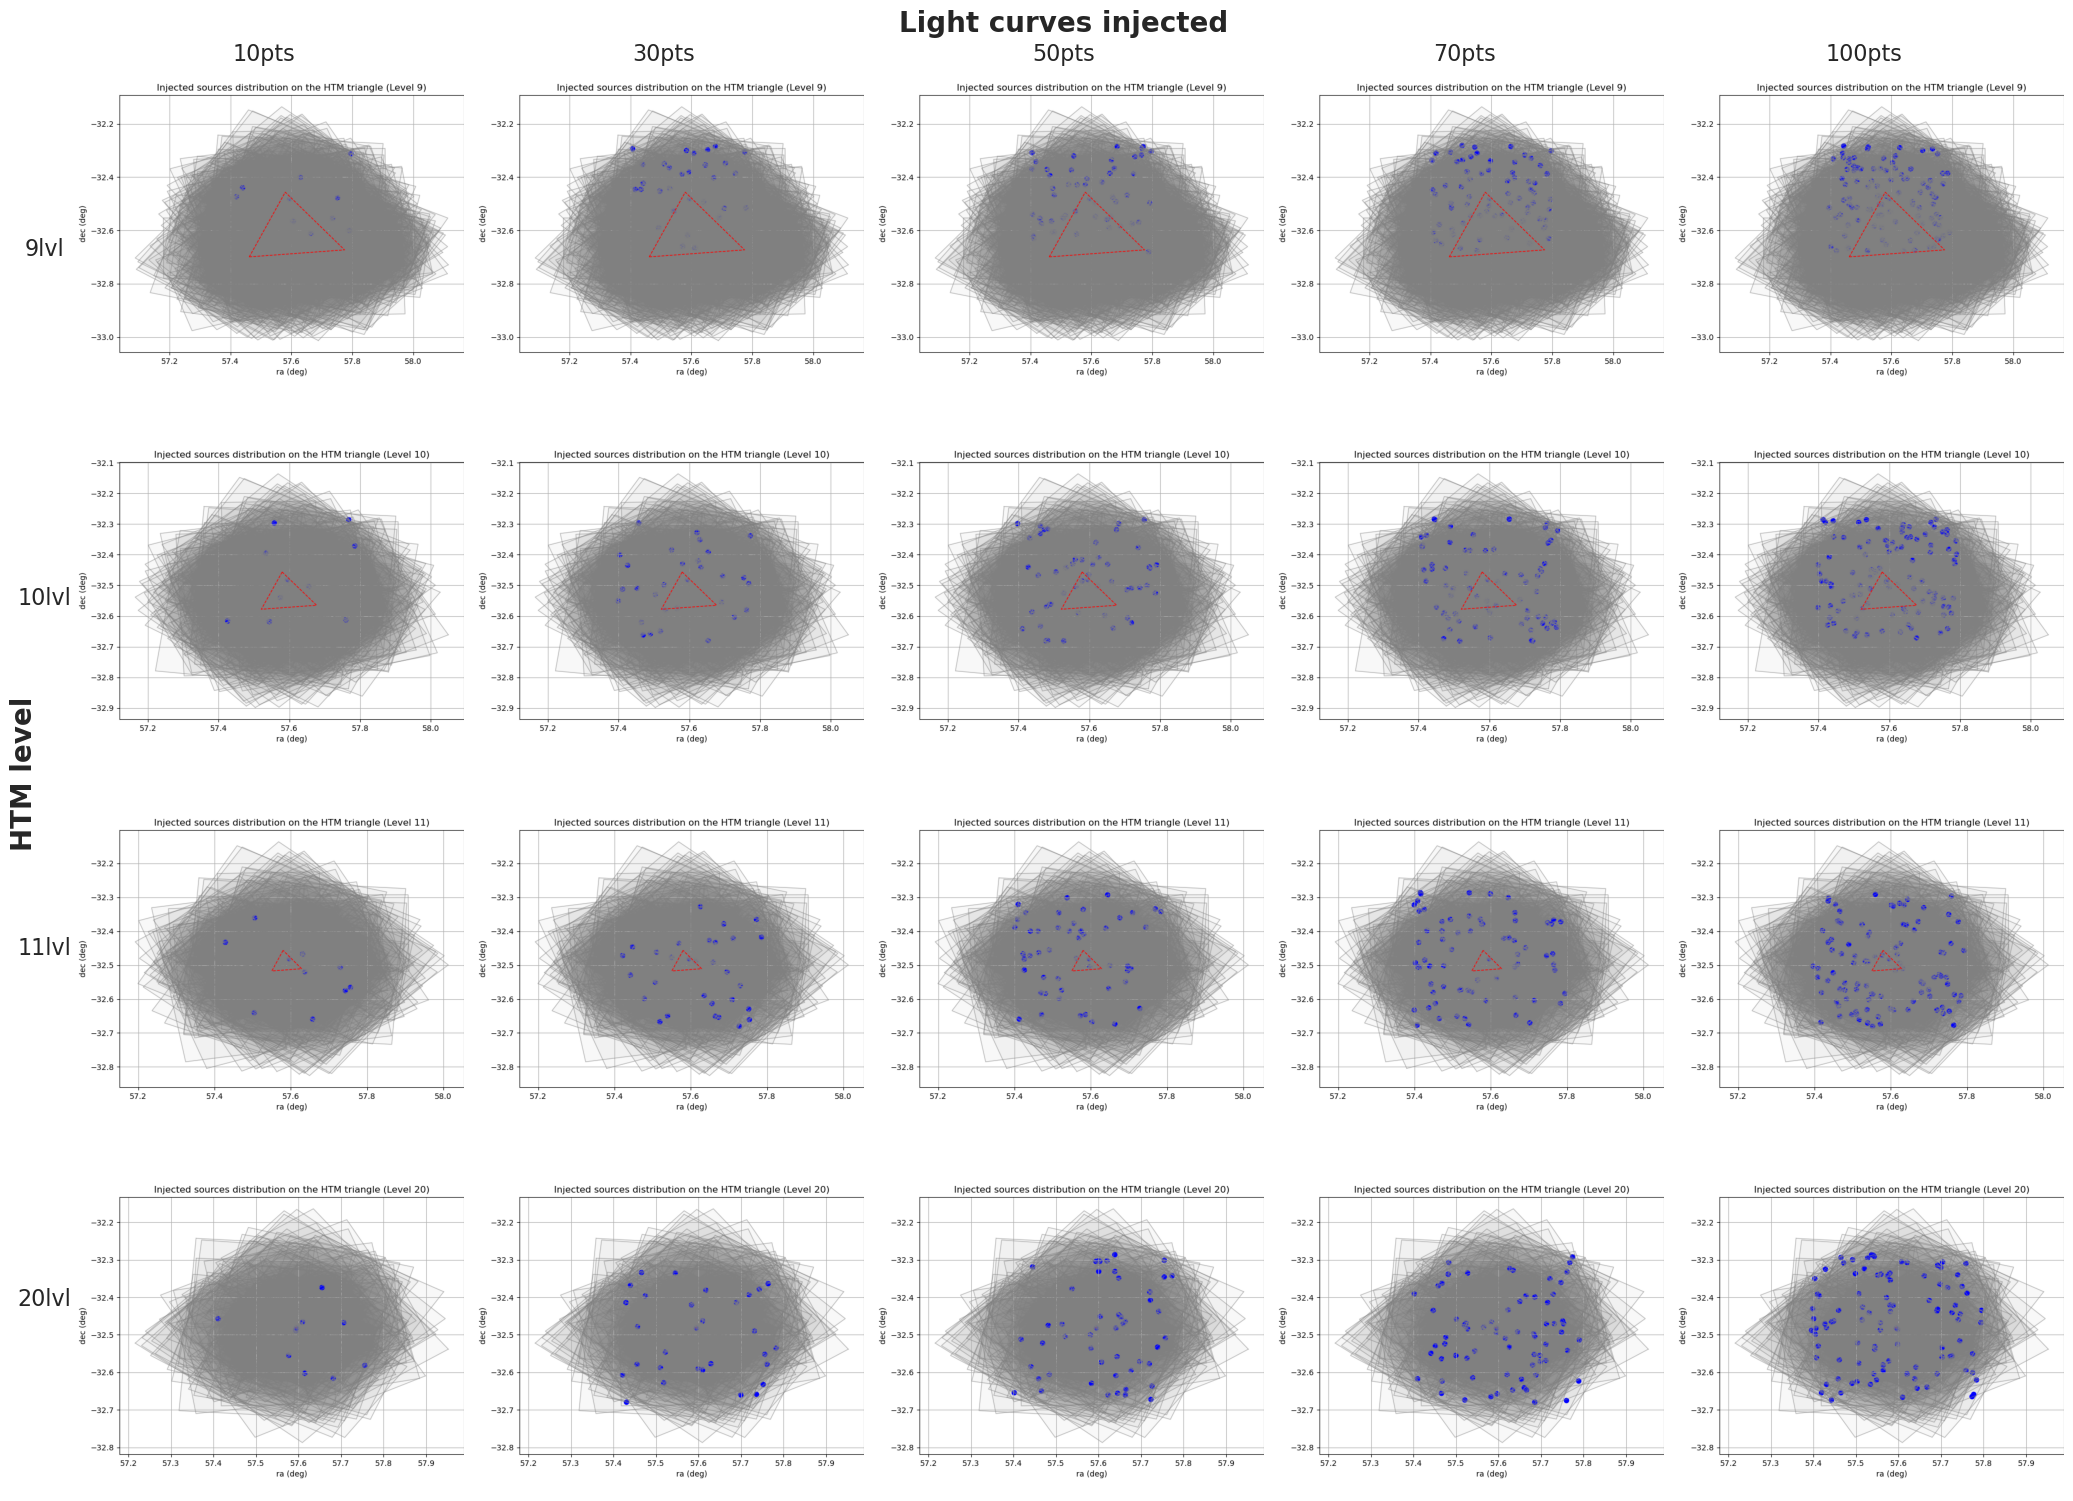

In [133]:
# Sky plots of injected sources + HTM triangle + calexps (for each combination of lvl and n_lc
import os
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

main_folder = "runs/test_10_calexps"
pattern = r"run_(\d+)pts_(\d+)lvl"

plots = []
pts_values = []
lvl_values = []

for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(pattern, subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(int(pts))
            lvl_values.append(int(lvl))
            
            sky_map_path = os.path.join(subfolder_path, "sky_map.png")
            if os.path.exists(sky_map_path):
                plots.append(sky_map_path)

unique_pts = sorted(set(pts_values))  
unique_lvl = sorted(set(lvl_values)) 


fig, axes = plt.subplots(len(unique_lvl), len(unique_pts), figsize=(20, 15))
axes = axes.reshape((len(unique_lvl), len(unique_pts)))
for i, lvl in enumerate(unique_lvl):
    for j, pts in enumerate(unique_pts):
        matching_plots = [plot for plot, p, l in zip(plots, pts_values, lvl_values) if p == pts and l == lvl]
        if matching_plots:
            img = Image.open(matching_plots[0])
            width, height = img.size
            new_width = int(width * 0.9) 
            img_cropped = img.crop((0, 0, new_width, height)) 
            img_cropped = img_cropped.convert("RGB")  
            img_array = np.array(img_cropped)
            ax = axes[i, j]
            ax.imshow(img_array)
            ax.axis('off')

fig.text(0.5, 1, 'Light curves injected', ha='center', va='center', fontsize=20, fontweight='bold')

for i, pts in enumerate(unique_pts):
    fig.text(0.1 + i * (0.8 / (len(unique_pts) - 1)), 0.98, f'{pts}pts', ha='center', va='center', fontsize=16)

fig.text(-0.02, 0.5, 'HTM level', ha='center', va='center', fontsize=20, fontweight='bold', rotation='vertical')

for i, lvl in enumerate(unique_lvl):
    fig.text(-0.01, 0.85 - i * (0.7 / (len(unique_lvl) - 1)), f'{lvl}lvl', ha='center', va='center', fontsize=16)

plt.subplots_adjust(hspace=0.01, wspace=0.01)  
plt.tight_layout(pad=0.01)
plt.savefig(main_folder+"/all_sky_maps.png", bbox_inches='tight')
plt.show()


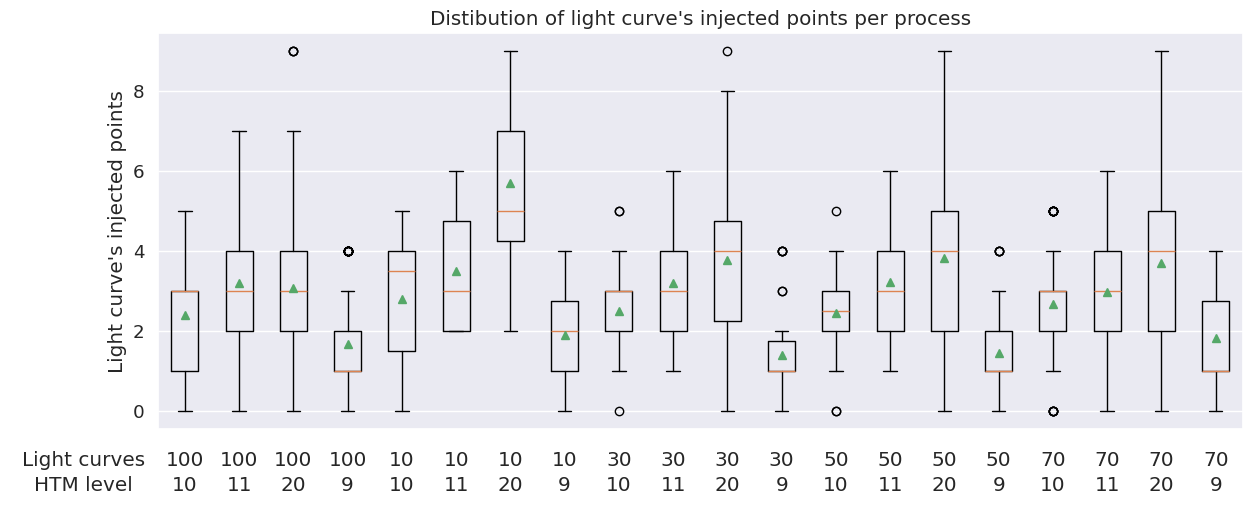

In [67]:
# Distribution of points extracted per light curve for each combination of HMTlevel and injected light curve
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

main_folder = "runs/test_10_calexps"
data_counts = []
pts_values = []
lvl_values = []

for subfolder in sorted([file for file in os.listdir(main_folder) if file.startswith("run")]):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        match = re.match(r'run_(\d+)pts_(\d+)lvl', subfolder)
        if match:
            pts, lvl = match.groups()
            pts_values.append(pts)
            lvl_values.append(lvl)

            mag_counts = []
            for file in os.listdir(subfolder_path):
                if file.endswith(".csv"):
                    file_path = os.path.join(subfolder_path, file)
                    df = pd.read_csv(file_path)
                    if "mag" in df.columns:
                        mag_count = df["mag"].count() 
                        mag_counts.append(mag_count)
            if mag_counts:
                data_counts.append(mag_counts)

from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(14, 6))
gs = GridSpec(2, 1, height_ratios=[9, 1], hspace=0.1)  

ax_boxplot = fig.add_subplot(gs[0])
ax_boxplot.boxplot(data_counts, showmeans=True)
ax_boxplot.set_ylabel("Light curve's injected points")
ax_boxplot.set_title("Distibution of light curve's injected points per process")
ax_boxplot.set_xticks([])  

ax_table = fig.add_subplot(gs[1])
ax_table.axis("off")  

table_data = [pts_values, lvl_values]
row_labels = ["Light curves", "HTM level"]
table = ax_table.table(cellText=table_data, rowLabels=row_labels,loc="center", cellLoc='center', rowLoc='center')

for cell in table.properties()['celld'].values():
    cell.set_linewidth(0)  

table.scale(1, 1.5) 
plt.savefig(main_folder+"/injected_points_per_lc_analysis.png")
plt.show()

Text(0.5, 1.0, 'Number of sources per calexp (total = 36)')

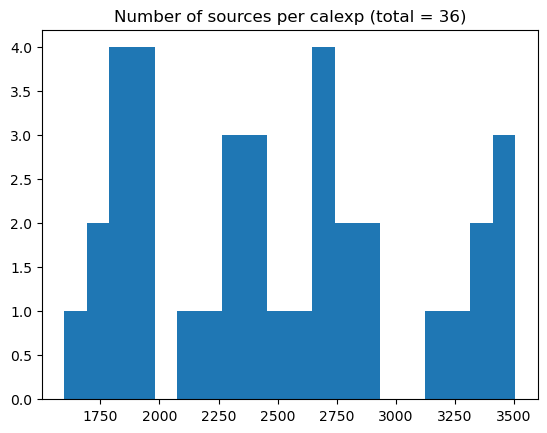

In [17]:
import matplotlib.pyplot as plt
plt.hist(n_sources, bins = 20)
plt.title(f"Number of sources per calexp (total = {len(n_sources)})")